Preprocessing of the data

In [15]:
import pandas as pd

In [16]:
animals = pd.read_csv("zoo.csv")

In [17]:
animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
animals.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [26]:
animals.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


AttributeError: 'NoneType' object has no attribute 'describe'

In [13]:
animals.info

<bound method DataFrame.info of      hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0           1    

In [21]:
#animals.count_values()
animals['hair'].value_counts()


0    58
1    43
Name: hair, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'count_values'

EDA
Let create some simple plots to check out the data!

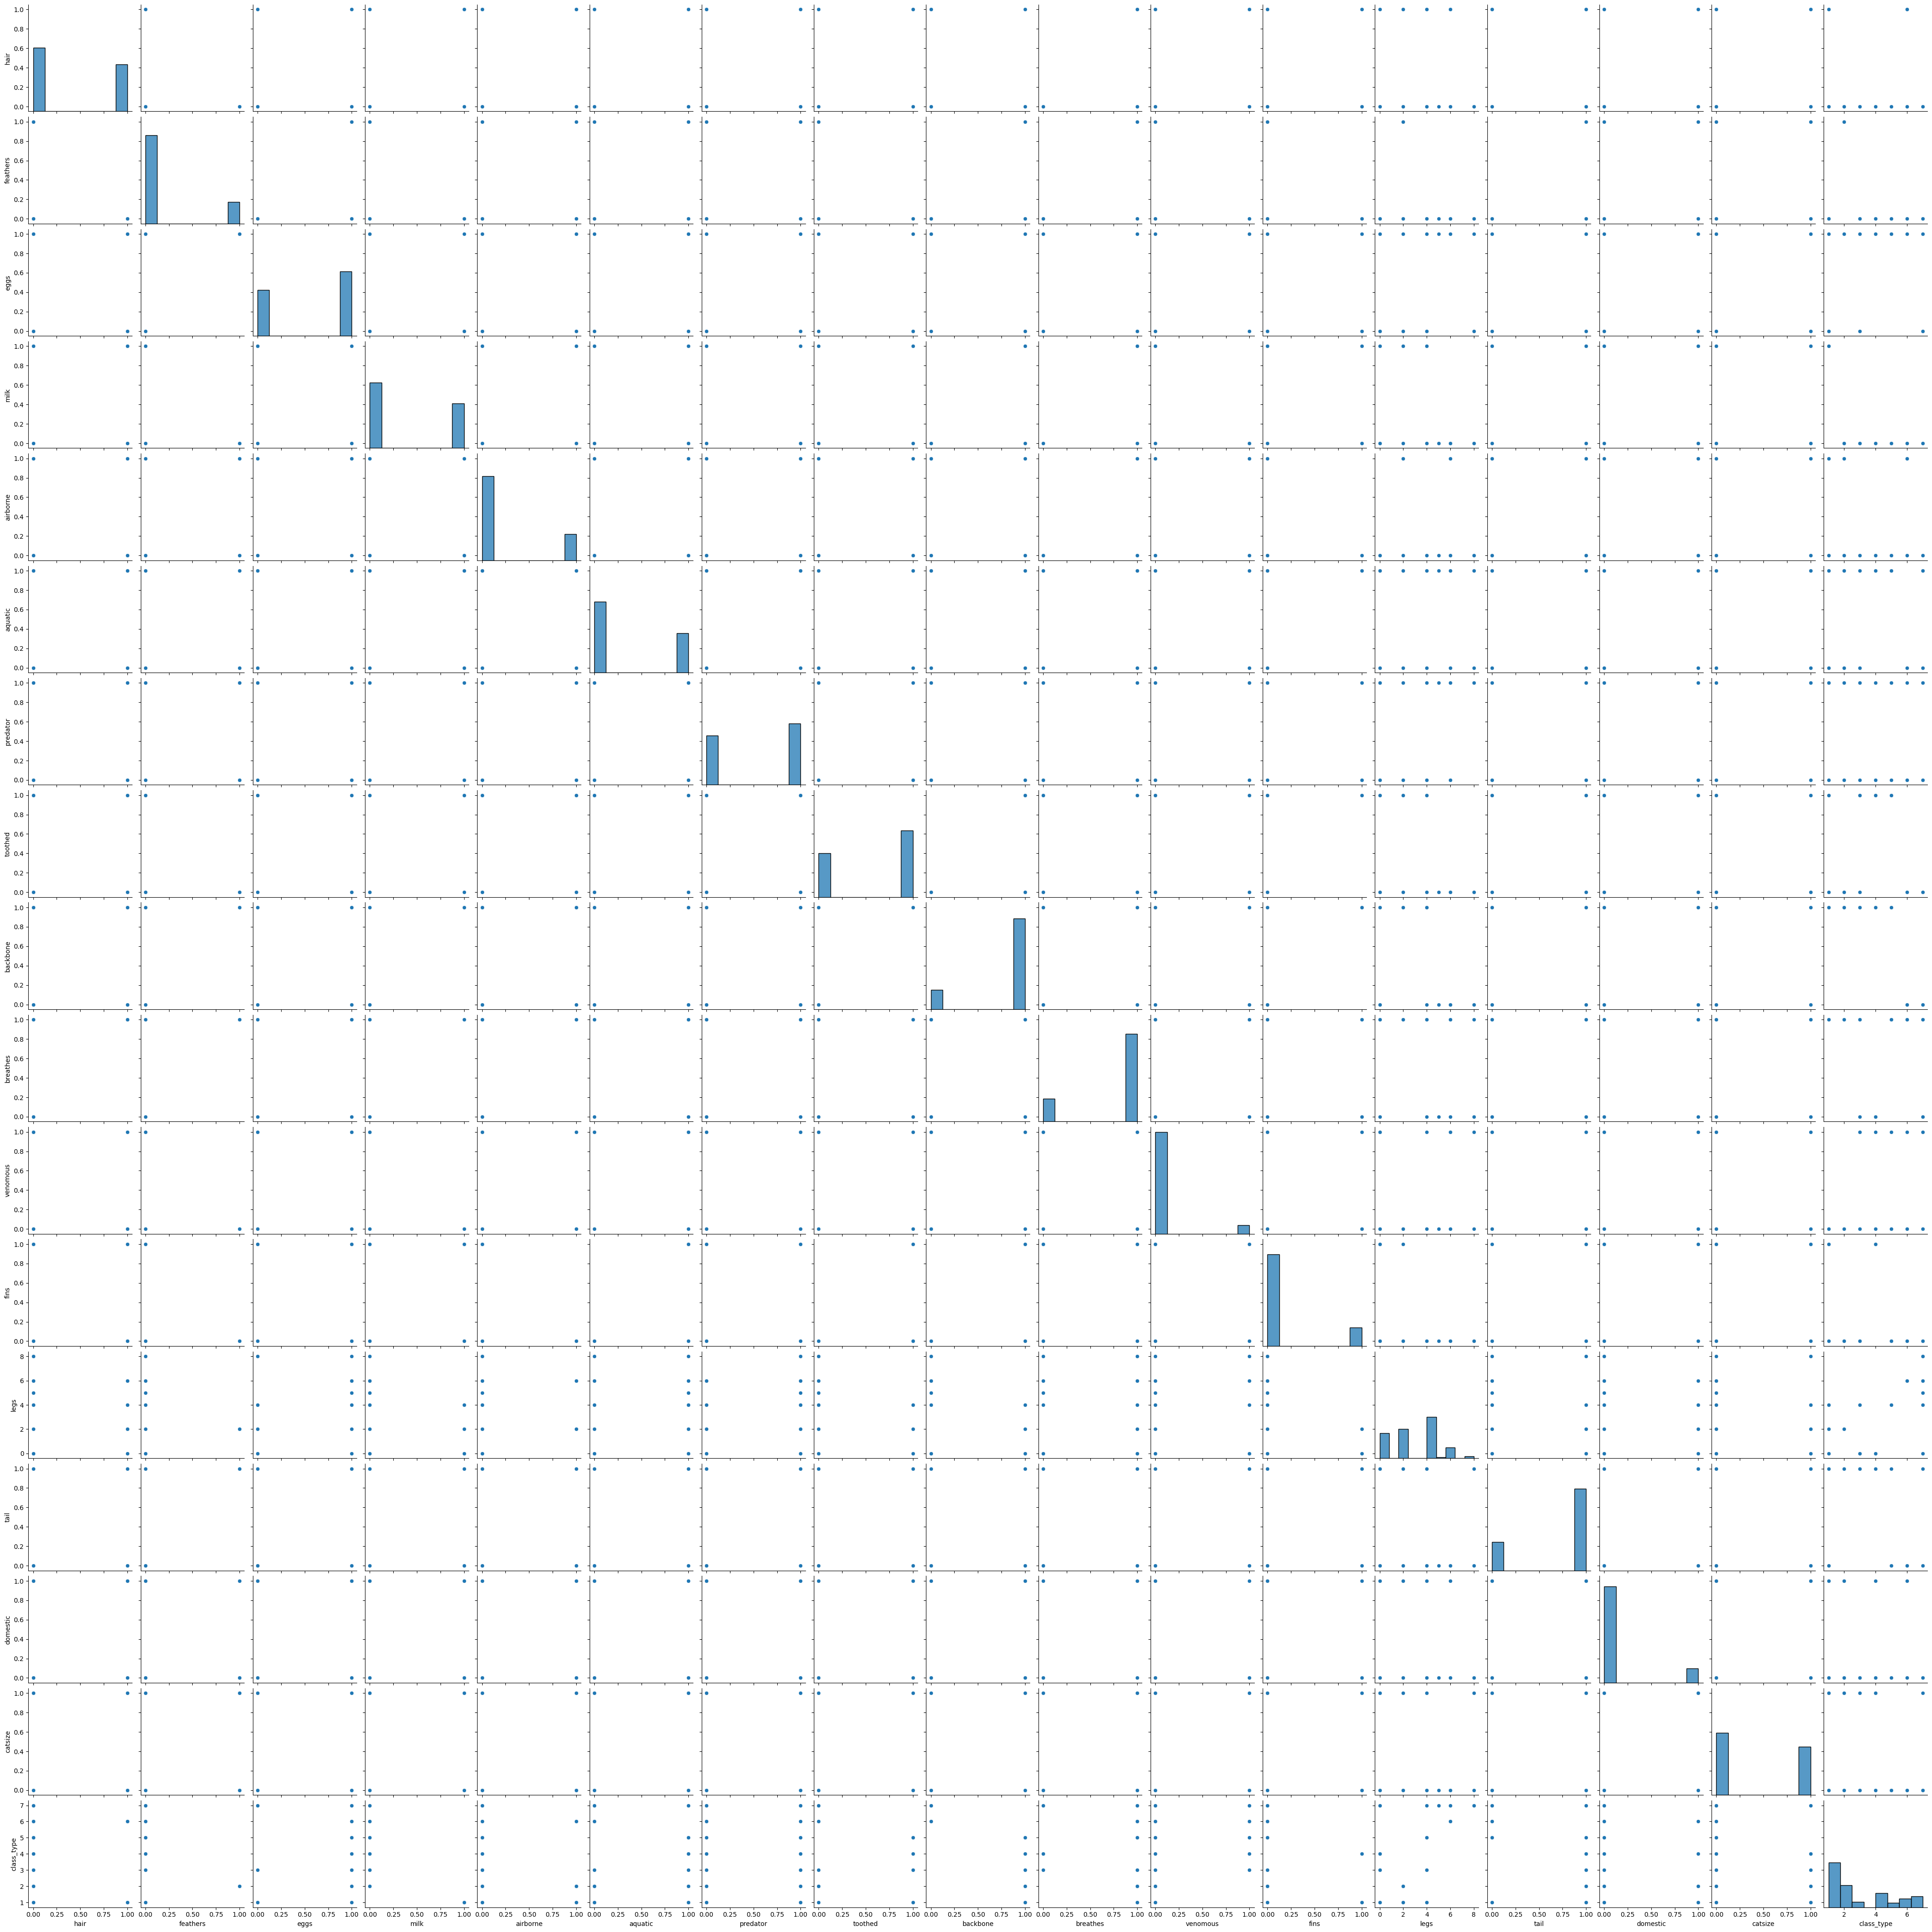

In [24]:
sns.pairplot(animals)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class_type', ylabel='Density'>

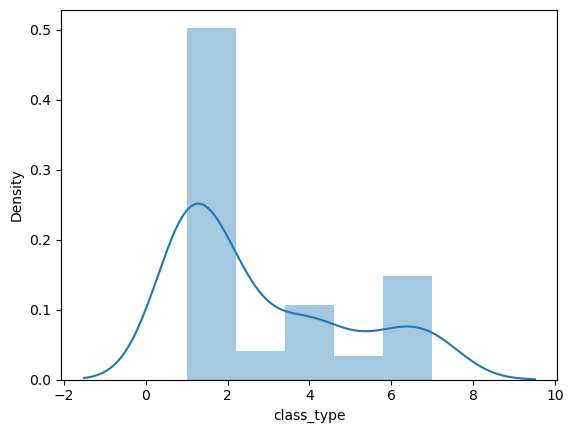

In [25]:
sns.distplot(animals["class_type"])

Training the model


In [30]:
#The data is splitted into X array(features for training) 
#y-array()
X =animals[ [ 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']]
y = animals['venomous']



In [36]:
#Splitting the data into training 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)



In [37]:
#Creating the model and train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
# print the intercept
print(lm.intercept_)

1.069660329510959


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
hair,0.408411
feathers,-0.834140
eggs,-0.809135
milk,-1.390333
airborne,0.020280
aquatic,0.231805
predator,0.092348
toothed,-0.554978
backbone,0.360538
breathes,0.229603


making some prediction

In [42]:
lm.predict(X_test)

array([ 5.54933949e-03, -6.99954606e-02,  2.23520612e-02,  2.37354335e-01,
        6.04557855e-01,  4.58670733e-02, -8.67981823e-02,  2.63287119e-02,
        4.20388492e-02,  3.97230377e-04,  2.16053661e-02, -1.85586304e-02,
       -8.67981823e-02,  5.54933949e-03,  2.23520612e-02,  2.16053661e-02,
        1.68261893e-01,  2.14296879e-01,  3.02671522e-01,  4.82974407e-01,
        1.45006814e-01,  6.74780430e-04, -4.64804485e-02,  4.80264447e-03,
        2.54157057e-01,  2.23520612e-02,  2.37354335e-01,  2.13246365e-01,
        4.58670733e-02,  1.66631827e-01,  2.23520612e-02])